## Understanding the file paths
For working with image files first of all we need to identify the path of those file. In my machine I stored my image data in the following directory ```E:\DeepLearning-Data\Malaria```

In [5]:
import os

In [6]:
data_dir = 'E:\DeepLearning-Data\Malaria'

### Train test folder 
We have two folder named train and test under Malaria folder. And inside the train folder we have two different folder for normal and indected sell same for test folder.

In [7]:
os.listdir(data_dir)

['test', 'train']

## Importing necessary libraries.

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

### Here we are creating the train and test path. These are the file path for our train and test Data

In [9]:
train_path = data_dir+'\\train'
test_path = data_dir+'\\test'

In [10]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [11]:
os.listdir(train_path+'\\parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [12]:
single_image = train_path+'\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'
single_image

'E:\\DeepLearning-Data\\Malaria\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [13]:
infected_image = imread(single_image)
infected_image.shape

(148, 142, 3)

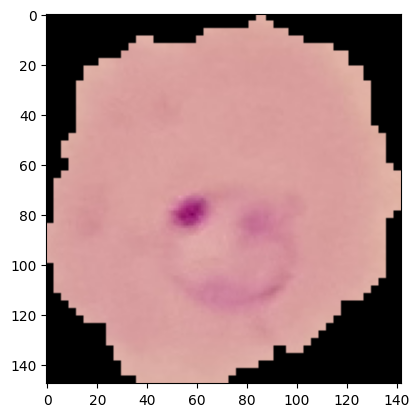

In [14]:
# this is an infected cell
plt.imshow(infected_image)
plt.show()

In [15]:
os.listdir(train_path+'\\uninfected')[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [16]:
uninfected_cell = train_path+'\\uninfected\\C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [17]:
uninfected = imread(uninfected_cell)

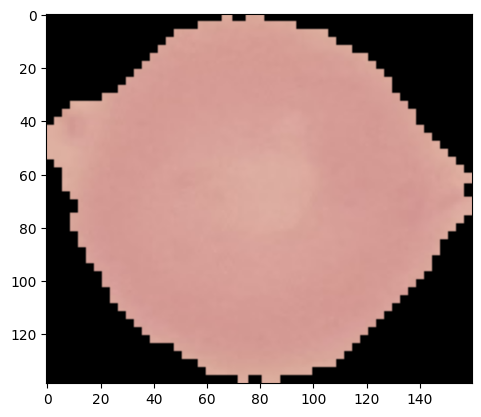

In [18]:
# this is a healthy cell
plt.imshow(uninfected)

## How many images we have in our train and test set

In [19]:
os.listdir(train_path)

['parasitized', 'uninfected']

### Length of Train set

In [20]:
len(os.listdir(train_path+'\\parasitized'))

12480

In [21]:
len(os.listdir(train_path+'\\uninfected'))

12480

### Length of Test set

In [22]:
len(os.listdir(test_path+'\\parasitized'))

1300

In [23]:
len(os.listdir(test_path+'\\uninfected'))

1300

## Check the dimension of all the images in the test set

In [24]:
dim1 = []
dim2 = []
color = []
for image in os.listdir(test_path+'\\uninfected'):
    img = imread(test_path+'\\uninfected\\'+image)
    d1,d2,c = img.shape
    dim1.append(d1)
    dim2.append(d2)    
    color.append(c)    

### These are all the unique values for first dimension

In [25]:
np.unique(np.array(dim1))

array([ 58,  61,  70,  76,  85,  88,  91,  94,  97, 100, 103, 106, 109,
       112, 115, 118, 121, 124, 127, 130, 133, 136, 139, 142, 145, 148,
       151, 154, 157, 160, 163, 166, 169, 172, 175, 178, 181, 184, 187,
       190, 193, 196, 199, 211, 214])

### These are all the unique values for second dimension

In [26]:
np.unique(np.array(dim2))

array([ 49,  64,  70,  73,  76,  79,  82,  85,  88,  91,  94,  97, 100,
       103, 106, 109, 112, 115, 118, 121, 124, 127, 130, 133, 136, 139,
       142, 145, 148, 151, 154, 157, 160, 163, 166, 169, 172, 175, 178,
       181, 184, 187, 190, 193, 196, 202, 205, 214, 217])

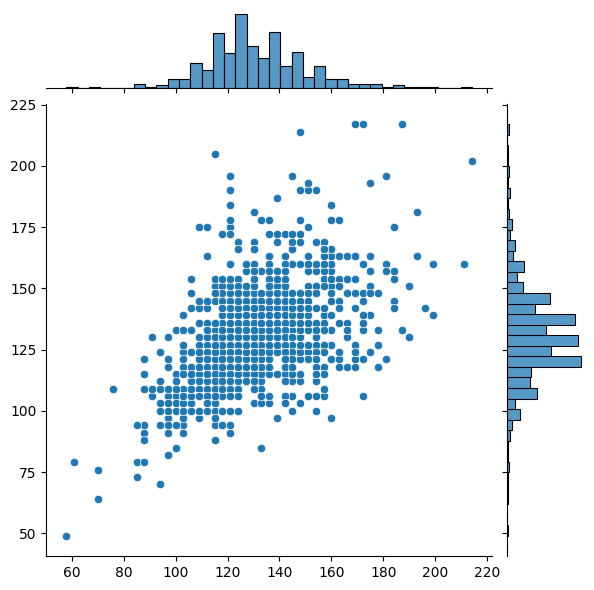

In [27]:
sns.jointplot(x=dim1,y=dim2)
plt.show()

In [ ]:
# the mean of dim1 and dim2
print(np.mean(dim1))
print(np.mean(dim2))

In [ ]:
# We will reshape all the image to this shape
# CNN requires all the image of same shape
image_shape = (130,130,3)
130*130*3

# Manipulate images

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
# this data set is already scaled. If not then we can use """rescale = 1/255""" 
image_gen = ImageDataGenerator(rotation_range=20, 
                               width_shift_range=.1,
                               height_shift_range=.1,
                               shear_range=.1,
                               zoom_range = .1,
                               horizontal_flip=True,
                               fill_mode='nearest'
                              )

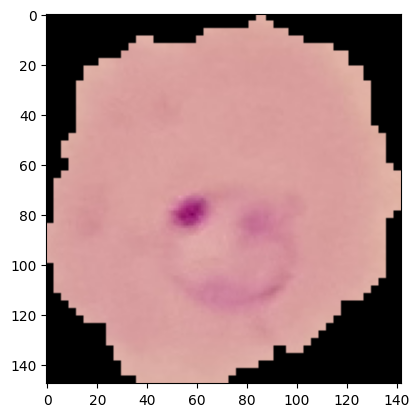

In [28]:
plt.imshow(infected_image)
plt.show()

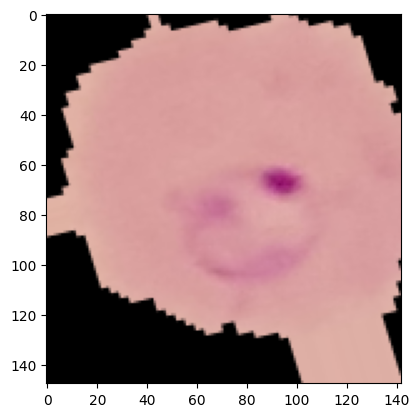

In [29]:
plt.imshow(image_gen.random_transform(infected_image))
plt.show()

### Generating many manipulated images from a directory

In order to use .flow_from_directory, we must organize the images in sub-directories. This is an absolute requirement, otherwise the method won't work. The directories should only contain images of one class, so one folder per class of images.

Structure Needed:

* Image Data Folder
    * Class 1
        * 0.jpg
        * 1.jpg
        * ...
    * Class 2
        * 0.jpg
        * 1.jpg
        * ...
    * ...
    * Class n

In [30]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [31]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


# Modeling

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [33]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), input_shape = image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), input_shape = image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), input_shape = image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

### Using a early stopping callback here
It will prevent overfitting. The validation loss will be monitored. 

In [35]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=3, mode='min')

In [36]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=16,
                                                class_mode='binary')

Found 24958 images belonging to 2 classes.


In [37]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=16,
                                               class_mode='binary',
                                               shuffle=False)

Found 2600 images belonging to 2 classes.


In [38]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [39]:
results = model.fit(train_image_gen, epochs=10,
                              validation_data = test_image_gen,
                              callbacks=[early_stop])

Epoch 1/5
1560/1560 [==============================] - 680s 435ms/step - loss: 0.9576 - accuracy: 0.5458 - val_loss: 0.6860 - val_accuracy: 0.5688
Epoch 2/5
1560/1560 [==============================] - 461s 295ms/step - loss: 0.6808 - accuracy: 0.5779 - val_loss: 0.6671 - val_accuracy: 0.5950
Epoch 3/5
1560/1560 [==============================] - 453s 291ms/step - loss: 0.6757 - accuracy: 0.5894 - val_loss: 0.6655 - val_accuracy: 0.6073
Epoch 4/5
1560/1560 [==============================] - 464s 298ms/step - loss: 0.6685 - accuracy: 0.5978 - val_loss: 0.6673 - val_accuracy: 0.5908
Epoch 5/5
1560/1560 [==============================] - 460s 295ms/step - loss: 0.6828 - accuracy: 0.5996 - val_loss: 0.6653 - val_accuracy: 0.6158


In [40]:
loss_df = pd.DataFrame(model.history.history)
loss_df.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

In [41]:
### Plot training loss vs validation loss

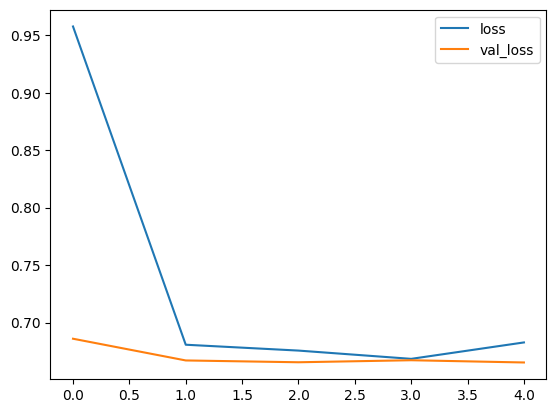

In [42]:
loss_df[['loss','val_loss']].plot()
plt.show()

### Plot training accuracy vs validation accuracy

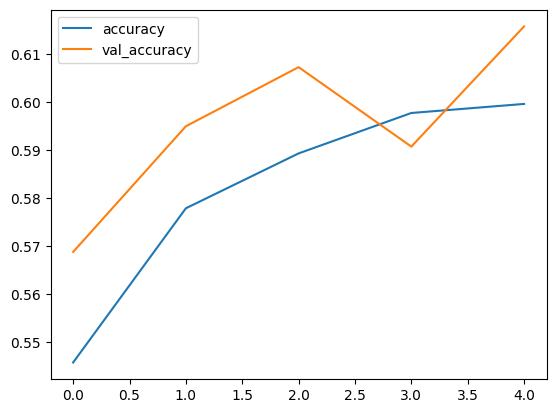

In [43]:
loss_df[['accuracy','val_accuracy']].plot()
plt.show()

## Evaluate the model performance on test set

In [44]:
model.evaluate(test_image_gen, verbose=0)

[0.6703959107398987, 0.5907692313194275]

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
y_pred = model.predict(test_image_gen)

163/163 [==============================] - 19s 114ms/step


In [47]:
y_pred = y_pred.round()

In [48]:
y_true = test_image_gen.classes

In [49]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.75      0.65      1300
           1       0.65      0.47      0.54      1300

    accuracy                           0.61      2600
   macro avg       0.62      0.61      0.60      2600
weighted avg       0.62      0.61      0.60      2600



In [50]:
import seaborn as sns

In [51]:
cnf = confusion_matrix(y_true,y_pred)
cnf

array([[970, 330],
       [694, 606]], dtype=int64)

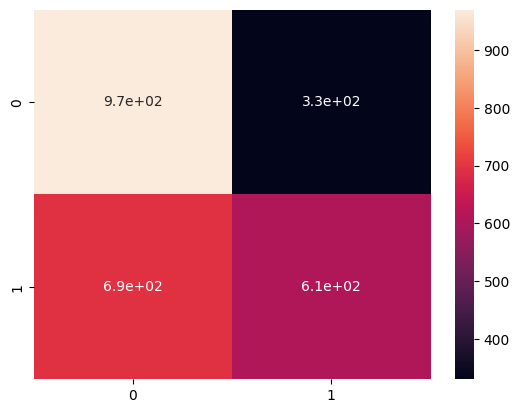

In [52]:
sns.heatmap(cnf, annot=True)
plt.show()